# 1. Setup

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from logistic_regression import LogisticRegressionNeuron
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Diabetes Dataset

To test our logistic regression neuron, we're gonna use data that uses various numerical variables to predict the likelihood of a person developing diabetes. In this case, we exclusively have numerical variables, which allows us to easily fit a logistic regression. 

In [ ]:
df = pd.read_csv("diabetes2.csv")

# ## Explore the Data
#
# Let's take a quick look at the data.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Because we don't have categorical variables, we only need to standardize our variables to the mean. 

In [ ]:
#Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Testing Our Neuron

When we run our base neuron model, we see that the logistic regression neuron correctly categorizes whether a patient has diabetes or not 75% of the time. We'll compare this against the default sci-kit logistic regression algorithm to see if we are able to match it in effeciency. 

In [6]:
neuron = LogisticRegressionNeuron(learning_rate=0.01, n_iters=10000)
neuron.fit(X_train, y_train)

# Make predictions
predictions = neuron.predict(X_test)
print("Predictions:", predictions)

# Evaluate the model
accuracy = neuron.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print(classification_report(y_test, predictions))

Predictions: [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [9]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
sk_predictions = logreg_model.predict(X_test)
sk_accuracy = accuracy_score(y_test, sk_predictions)
print(f"Scikit-learn Logistic Regression Accuracy: {sk_accuracy:.2f}")
print("Scikit-learn Logistic Regression Classification Report:")
print(classification_report(y_test, sk_predictions))

Scikit-learn Logistic Regression Accuracy: 0.75
Scikit-learn Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



We get more or less the same results whether we use our own logistic regression neuron or the built in sci-kit model. This comparison indicates that our logistic regression neuron is very effective, matching the best built in algorithms at this task.

# Visualizing the Evolution
As we see, the accuarcy increases with the number of iterations, exponentially approaching the default built in algorithm.

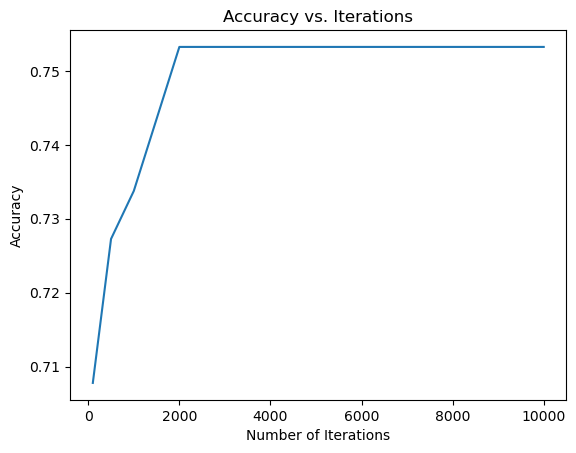

In [12]:
# Store accuracies for different numbers of iterations
iterations = [100, 500, 1000, 2000, 5000, 10000]
accuracies = []

for n_iters in iterations:
    neuron = LogisticRegressionNeuron(learning_rate=0.01, n_iters=n_iters)
    neuron.fit(X_train, y_train)
    accuracy = neuron.score(X_test, y_test)
    accuracies.append(accuracy)

# Plotting
plt.plot(iterations, accuracies)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iterations')
plt.show()

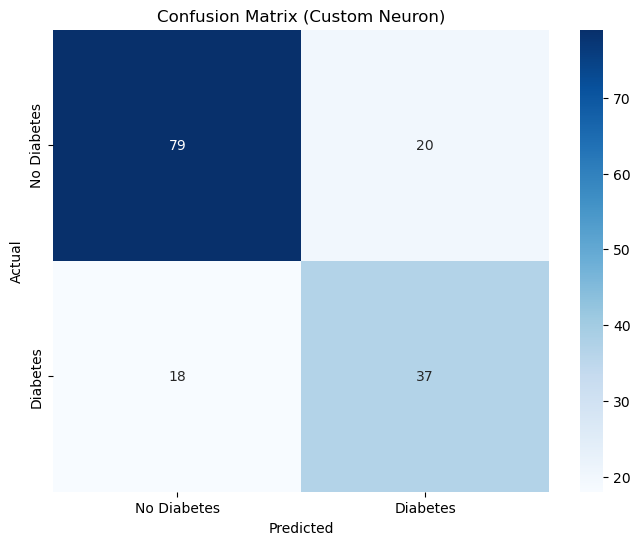

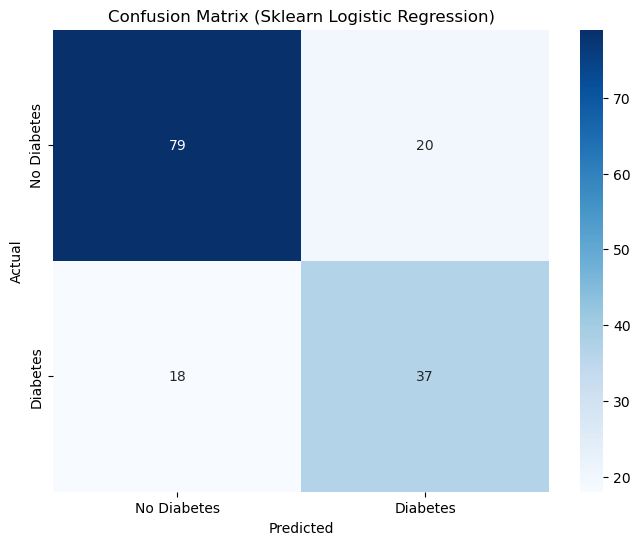

In [19]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, predictions)


# Visualize the Confusion Matrix for Custom Neuron
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Custom Neuron)')
plt.show()

# Print confusion matrix for sklearn
cm_sk = confusion_matrix(y_test, sk_predictions)


# Visualize the Confusion Matrix for Sklearn Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sklearn Logistic Regression)')
plt.show()

When we compare the confusion matrix, we see that they are exactly the same for both the logistic regression neuron, and the default sci kit model. This is good.